In [1]:
# Handwritten Digit Recognition with MLP based on tensorflow

In [1]:
# Steps involved

# 1. Importing Libraries
# 2. Load and explore the data
# 3. Preprocessing
# 4. Build a MLP model
# 5. Compile and train the model
# 6. Evaluate the model
# 7. Visualize the performance
# 8. Make prediction & display the results

In [2]:
# Step 1. Import the libraries
print("Step 1: Importing Libraries")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import time
print("Libraries imported Successfully")

Step 1: Importing Libraries
Libraries imported Successfully


Step 2 - Loading and exploring MNIST data
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training image shape: (60000, 28, 28)
Training label shape: (60000,)
Testing image shape: (10000, 28, 28)
Testing label shape: (10000,)

Display sample data


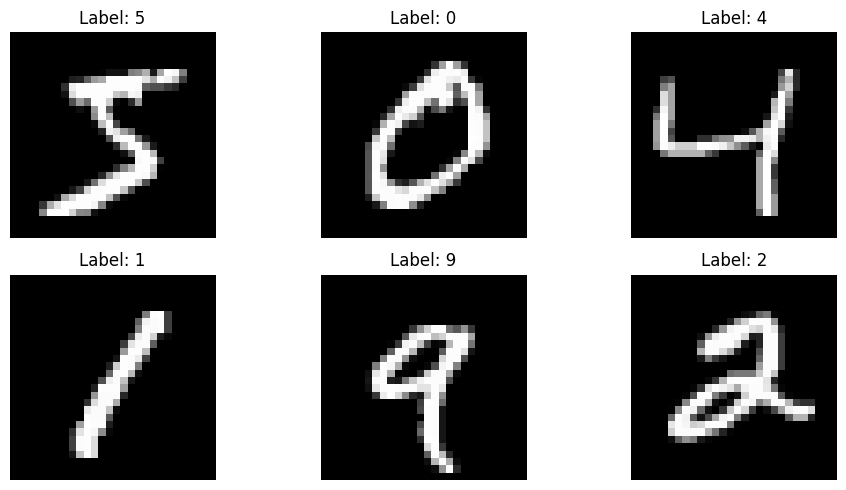

Data loaded and sample image displayed


In [3]:
# Step 2 - Load and explore the data
print("Step 2 - Loading and exploring MNIST data")

#Load MNIST data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Explore the data
print(f"Training image shape: {x_train.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing image shape: {x_test.shape}")
print(f"Testing label shape: {y_test.shape}")

print("\nDisplay sample data")
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis("off")
plt.tight_layout()
plt.show()

print("Data loaded and sample image displayed")

In [4]:
# Step 3 - Preprocessing data
print("step 3 - Preprocessing data")

# Normalize the pixel value
# Pixel values range from 0 (black) - 255 (white)
# Normalize this values to [0,1]
# We do this by divide by 255

x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0

print(f"Pixel values normalized. Example {x_train_normalized.min(), x_train_normalized.max()} ")

# Flatten Image
# Our MLP model expects a flat vector of inputs for each image, not a 2d grid.
# We reshape each 28x28 images into 1D vector of 28 * 28 = 784 pixels

original_train_shape = x_train.shape
original_test_shape = x_test.shape

x_train_flattened = x_train_normalized.reshape(-1, 28*28)
x_test_flattened = x_test_normalized.reshape(-1, 28*28)

print(f"Images flattened from {original_train_shape} to {x_train_flattened.shape}")

step 3 - Preprocessing data
Pixel values normalized. Example (np.float64(0.0), np.float64(1.0)) 
Images flattened from (60000, 28, 28) to (60000, 784)


In [5]:
# Convert labels into categorical values (one-hot encoding)
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print(f"Labels converted to one-hot encoding. Example- original: {y_train[0]}, one-hot: {y_train_cat[0]}")
print("Data preprocessing is complete")

Labels converted to one-hot encoding. Example- original: 5, one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Data preprocessing is complete


In [6]:
# Step -4 Building the MLP
print("Step-4 - Building the MLP model ")

# Define the MLP model

model = keras.Sequential([
    # Input layer
    layers.Input(shape=(784,), name = "input_layer"),
    # Hidden Layer 1
    layers.Dense(128, activation="relu", name = "hidden_layer_1"),
    # Hidden Layer 2
    layers.Dense(64, activation="relu", name = "hidden_layer_2"),
    # Hidden Layer 3
    layers.Dense(32, activation="relu", name = "hidden_layer_3"),
    # Output Layer
    layers.Dense(num_classes, activation="softmax", name="output_layer")

], name = "mnist_mlp")

# Display the model architecture summary
print("Model architecture summary")
model.summary()

print("Model Built successfully")

Step-4 - Building the MLP model 
Model architecture summary


Model: "mnist_mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Model Built successfully


In [7]:
# Step - 5 Compile and train the model
print("Step -5 - Compiling and training the model")

# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
print("Starting training")
start_time = time.time()
history = model.fit(x_train_flattened, y_train_cat, epochs=10, batch_size=32, validation_data=(x_test_flattened,y_test_cat))
end_time = time.time()
training_time = end_time-start_time
print(f"Training completed in {training_time:.2f} seconds")

Step -5 - Compiling and training the model
Starting training
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8725 - loss: 0.4418 - val_accuracy: 0.9562 - val_loss: 0.1392
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1091 - val_accuracy: 0.9677 - val_loss: 0.1117
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0729 - val_accuracy: 0.9737 - val_loss: 0.0864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9829 - loss: 0.0535 - val_accuracy: 0.9765 - val_loss: 0.0811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0436 - val_accuracy: 0.9762 - val_loss: 0.0838
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9736 - val_loss: 0.0882
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0301 - val_accuracy: 0.9759 - val_loss: 0.0868
Epoch 8/10
1875/1875 ━━━━━━━━

In [8]:
# Step -6 Evaluate the model
print("Step 6 - Evaluating the model on test set")

# Evaluate the trained model on the test set
test_loss, test_acc = model.evaluate(x_test_flattened,y_test_cat, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("Model evaluation completed")

Step 6 - Evaluating the model on test set
313/313 - 1s - 2ms/step - accuracy: 0.9774 - loss: 0.1000
Test Loss: 0.1000
Test accuracy: 0.9774
Model evaluation completed


Step 7 - Visualizing the training performance


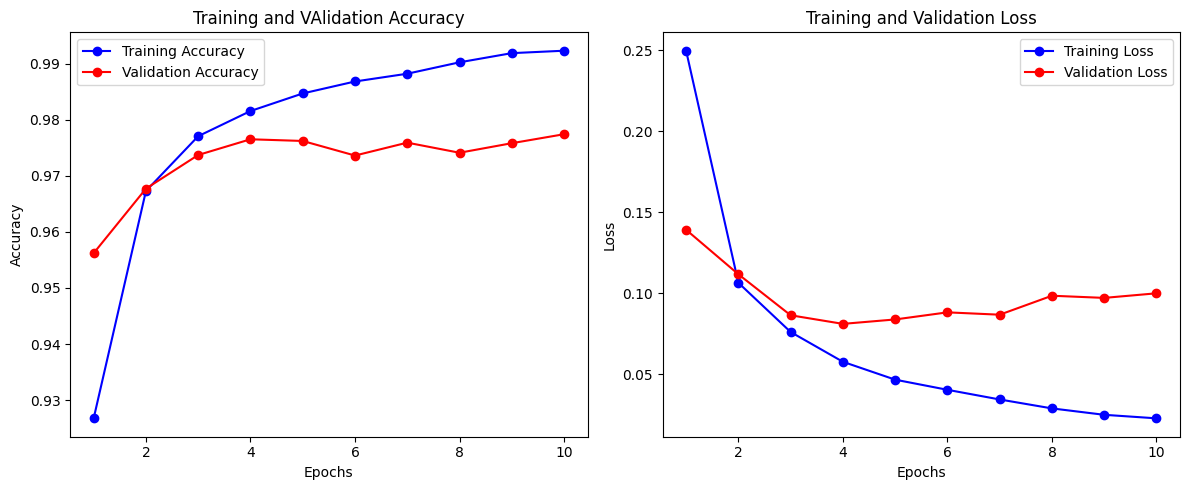

Performance Visualization completed


In [9]:
# Step 7  - Visualize Performance
print("Step 7 - Visualizing the training performance")

#access the training history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc)+1)

#plot accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, 'bo-',label= "Training Accuracy", )
plt.plot(epochs_range, val_acc, 'ro-', label = "Validation Accuracy")
plt.title("Training and VAlidation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#plot loss
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, 'bo-', label = "Training Loss")
plt.plot(epochs_range, val_loss, 'ro-', label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Performance Visualization completed")

Step 8 - Making predictions and Analyzing results
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Displaying sample test images with preditions


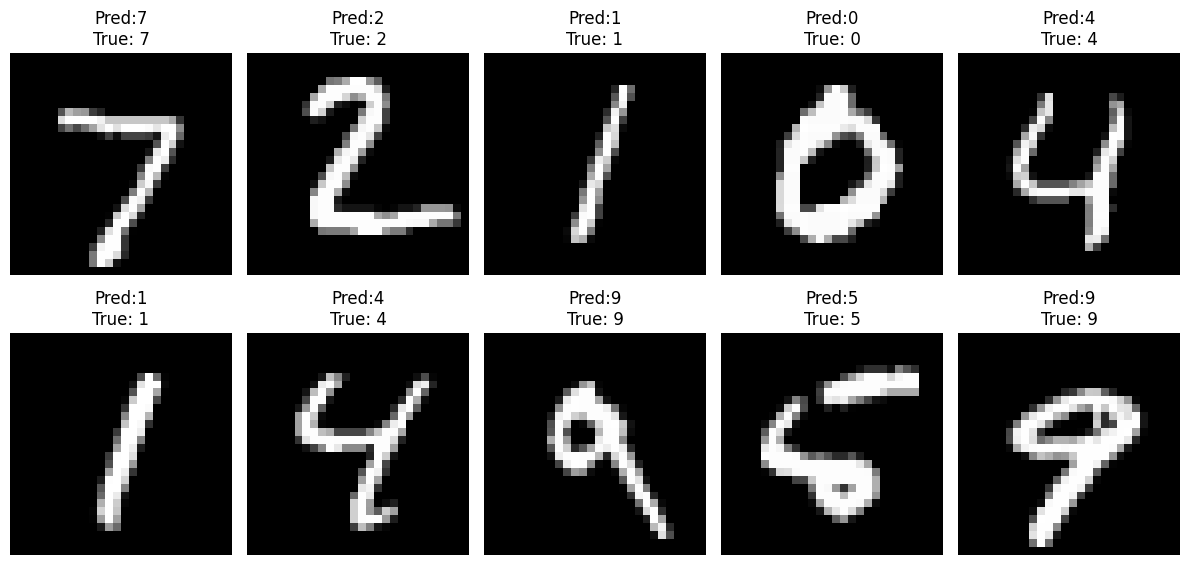


Generating Confusion matrix


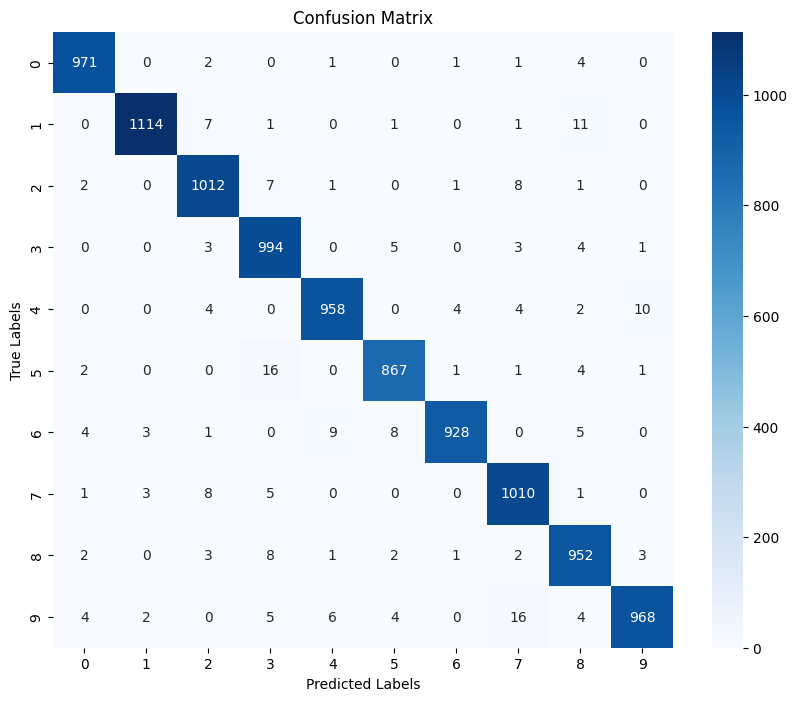


Generating classification report

CLassification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Prediction Analysis Completed


In [10]:
# Step 8 - Make predictions & Display the result
print("Step 8 - Making predictions and Analyzing results")

# Make predictions
prediction_probabilities = model.predict(x_test_flattened)

y_pred = np.argmax(prediction_probabilities, axis = 1)

print("Displaying sample test images with preditions")

plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(x_test_flattened[i].reshape(28,28), cmap = "gray")
  plt.title(f"Pred:{y_pred[i]}\nTrue: {y_test[i]}")
  plt.axis("off")
plt.tight_layout()
plt.show()

print("\nGenerating Confusion matrix")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt = "d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("\nGenerating classification report")
report = classification_report(y_test, y_pred, target_names = [str(i) for i in range(10)])
print(f"\nCLassification Report: \n {report}")

print("Prediction Analysis Completed")